<a href="https://colab.research.google.com/github/richirey75/Data-Mining-CS4990/blob/main/dataminingproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Mounting my drive

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


## To make shell commands we need the "!" before the command

In [ ]:
!python --version

Python 3.10.12


- The % is a special command in Google Colab and Jupyter notebooks called a "magic command". These commands provide special functionalities.

- %cd is one such magic command which is used to change the current working directory.

In [ ]:
%cd /content/drive/MyDrive/CS4990GroupProject/CSV_files
!pwd

/content/drive/MyDrive/CS4990GroupProject/CSV_files
/content/drive/MyDrive/CS4990GroupProject/CSV_files


## USEFUL SHORTSCUTS

- Ctrl + M + H: Show all shortcuts
- Ctrl + M + B: Create a new cell below
- Ctrl + M + A: Create a new cell above
- Ctrl + M + D: Delete the current cell
- Ctrl + M + Y: Change cell to code
- Ctrl + M + M: Change cell to text
- Ctrl + Enter: Run the current cell
- Ctrl + Shift + Enter: Run the current cell and select the below cell

## Installation of Library
- We will using this library
  - [spotify library](https://spotipy.readthedocs.io/en/2.24.0/)


In [ ]:
!pip install spotipy --upgrade

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.2/261.2 kB 2.8 MB/s eta 0:00:00


## We need to import our libraries we will be using for the project
  - spotipy
  - pandas
  - numpy

In [ ]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import pandas as pd
import numpy as np

## This is how we will identify to the API
- We need to first get a key from [spotify dev](https://developer.spotify.com/)
- Will get two keys
  - Client Id key
  - Client Secret key

- Follow by inputting our keys and autheticating

In [ ]:
client_id = input("Enter your client_id: ")
client_secret = input("Enter your client_secret: ")

auth_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=auth_manager)

## Search function to query an artist
- As an example we the band call "the cramberries"
- This is just as if you were searching for an artists in the spotify environnement
- We get the artist ID

In [ ]:
results = sp.search(q='The Cranberries', limit=1, type='artist')
artist_id = results['artists']['items'][0]['id']
artist_id

'7t0rwkOPGlDPEhaOcVtOt9'

## Here is how to retreve albums from the artist_id from above
- We will use the artist ID to retrieve the albums from the artist page

In [ ]:
albums = sp.artist_albums(artist_id, album_type='album')

album_names = [album['name'] for album in albums['items']]

album_names

['To The Faithful Departed (Deluxe Edition)',
 'Remembering Dolores',
 'No Need To Argue (Remastered 2020)',
 'No Need To Argue (Deluxe)',
 'In the End',
 'Something Else',
 'Live At the Hammersmith Apollo, London 2012',
 'Roses',
 'Live 2010 - Zenith Paris, 22.03.10',
 'Bualadh Bos: The Cranberries Live',
 'Wake Up And Smell The Coffee',
 'Bury The Hatchet (The Complete Sessions 1998-1999)',
 'Bury The Hatchet',
 'To The Faithful Departed (The Complete Sessions 1996-1997)',
 'To The Faithful Departed',
 'No Need To Argue (The Complete Sessions 1994-1995)',
 "Everybody Else Is Doing It, So Why Can't We? - Super Deluxe",
 "Everybody Else Is Doing It, So Why Can't We? (The Complete Sessions 1991-1993)",
 "Everybody Else Is Doing It, So Why Can't We?"]

## We can extract the songs from an album
- Here the code gives back the album songs from the 18 position on the list above

In [ ]:
tracks = sp.album_tracks(albums['items'][18]['id'])
track_names = [track['name'] for track in tracks['items']]

track_names

['I Still Do',
 'Dreams',
 'Sunday',
 'Pretty',
 'Waltzing Back',
 'Not Sorry',
 'Linger',
 'Wanted',
 "Still Can't...",
 'I Will Always',
 'How',
 'Put Me Down']

## Using Pandas to organize
- We can use pandas to oprganize our data into a CSV file

In [ ]:
df = pd.DataFrame({'Track Names': track_names})
df.to_csv('track_names.csv', index=False)
df

,Track Names
0,I Still Do
1,Dreams
2,Sunday
3,Pretty
4,Waltzing Back
5,Not Sorry
6,Linger
7,Wanted
8,Still Can't...
9,I Will Always


## We enter the file that we want to save the svc files to

In [ ]:
%cd /content/drive/MyDrive/CS4990GroupProject/CSV_files
!pwd

/content/drive/MyDrive/CS4990GroupProject/CSV_files
/content/drive/MyDrive/CS4990GroupProject/CSV_files


# Now we use all the tools we learn above to queary an artist and retrieve all their information
- We query the artist
- Scrape their information
- Scrape their albums
- Scrape each song in their discography
- Use panda to save them in CSV files
- Lastly we save them in our drive

In [ ]:
# Artist information
artist_name = input("Enter an artist name: ")
result = sp.search(q=artist_name, limit=1, type='artist')
artist = result['artists']['items'][0]

artist_info = {
    'name': artist['name'],
    'id': artist['id'],
    'popularity': artist['popularity'],
    'genres': artist['genres'],
    'followers': artist['followers']['total']
}

# Album and track information with audio features
albums = sp.artist_albums(artist['id'], album_type='album')
all_tracks = []

for album in albums['items']:
    album_info = {
        'album_name': album['name'],
        'album_id': album['id'],
        'release_date': album['release_date'],
        'total_tracks': album['total_tracks']
    }

    tracks = sp.album_tracks(album['id'])
    for track in tracks['items']:
        track_info = {
            'track_name': track['name'],
            'track_id': track['id'],
            'duration_min': track['duration_ms'] / 60000
        }
        try:
            track_info['popularity'] = track['popularity']
        except KeyError:
            track_info['popularity'] = None

        # Get audio features
        audio_features = sp.audio_features(track['id'])[0]
        if audio_features:
            track_info.update(audio_features)

        all_tracks.append({**album_info, **track_info})

# Create DataFrames
artist_df = pd.DataFrame([artist_info])
tracks_df = pd.DataFrame(all_tracks)

# Save to CSV
artist_df.to_csv(f'{artist_name}_artist_info.csv', index=False)
tracks_df.to_csv(f'{artist_name}_tracks_info.csv', index=False)

Enter an artist name: Oasis


# Here is to concatenate the CSV files

In [ ]:
artist1 = pd.read_csv('Oasis_tracks_info.csv')
artist2 = pd.read_csv('cranberries_tracks_info.csv')

combined_df = pd.concat([artist1, artist2]) # add more DataFrames to the list if needed
combined_df.to_csv('Oasis_Cranberries_tracks_info.csv', index=False)

# Start to process the data using clustering
#### Need to add our libraries that we will be using and to read the files in our directory


In [ ]:
import pandas as pd
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [ ]:
# Load the data
df = pd.read_csv('Oasis_tracks_info.csv')

# Select audio features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)  # You can adjust the number of clusters
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_


In [ ]:
# Create the interactive 3D scatter plot
fig = px.scatter_3d(df, x='energy', y='danceability', z='valence',
                    color='cluster', color_continuous_scale='viridis',
                    opacity=0.7, title='Clusters of Oasis Tracks (Interactive)')

# Define cluster labels based on analysis (example)
cluster_labels = {
    0: 'High Energy, High Danceability',
    1: 'Low Energy, Low Danceability',
    2: 'Medium Energy, Medium Danceability'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Create the interactive 3D scatter plot with labels
fig = px.scatter_3d(df, x='energy', y='danceability', z='valence',
                    color='cluster_label', color_discrete_sequence=px.colors.qualitative.Set1,
                    opacity=0.7, title='Clusters of Oasis Tracks (Interactive)')



# Show the plot
fig.show()

In [ ]:
# Select audio features for clustering
features = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness',
            'instrumentalness', 'liveness', 'valence', 'tempo']
X = df[features]

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)
df['cluster'] = kmeans.labels_

# Analyze cluster characteristics
cluster_centers = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns=features)
# Print or inspect cluster_centers to understand their feature values

# Define cluster labels based on analysis (example)
cluster_labels = {
    0: 'High Energy, High Danceability',
    1: 'Low Energy, Low Danceability',
    2: 'Medium Energy, Medium Danceability'
}
df['cluster_label'] = df['cluster'].map(cluster_labels)

# Create the interactive 3D scatter plot with labels
fig = px.scatter_3d(df, x='energy', y='danceability', z='valence',
                    color='cluster_label', color_discrete_sequence=px.colors.qualitative.Set1,
                    opacity=0.7, title='Clusters of Oasis Tracks (Interactive)')

fig.show()

In [ ]:
Oasis_tracks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   album_name        253 non-null    object 
 1   album_id          253 non-null    object 
 2   release_date      253 non-null    object 
 3   total_tracks      253 non-null    int64  
 4   track_name        253 non-null    object 
 5   track_id          253 non-null    object 
 6   duration_min      253 non-null    float64
 7   popularity        0 non-null      float64
 8   danceability      253 non-null    float64
 9   energy            253 non-null    float64
 10  key               253 non-null    int64  
 11  loudness          253 non-null    float64
 12  mode              253 non-null    int64  
 13  speechiness       253 non-null    float64
 14  acousticness      253 non-null    float64
 15  instrumentalness  253 non-null    float64
 16  liveness          253 non-null    float64
 1

<Axes: xlabel='energy', ylabel='danceability'>

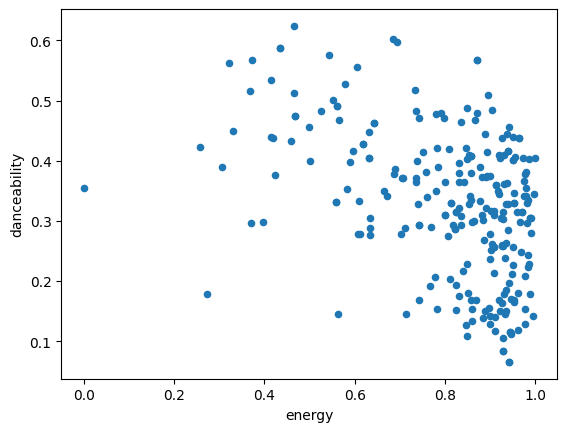

In [ ]:
Oasis_tracks.plot(x='energy', y='danceability', kind='scatter')

In [ ]:
cluster_centers

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.455024,0.484691,-7.744262,0.029079,0.475721,0.058903,0.256221,0.339667,107.115381
1,0.348563,0.845514,-3.996232,0.045725,0.028887,0.067110,0.291089,0.361148,121.926113
2,0.206351,0.918290,-3.924681,0.081714,0.027083,0.354229,0.654719,0.196145,129.121870


# K means algorithm
STEPS
1. Scale data
2. Set random centroid
3. Label each data point
4. Update centroids
5. Repeat steps 3 and 4 until the centroids do not change anymore

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tracks = pd.read_csv('Red Hot Chili Peppers_tracks_info.csv')

In [ ]:
tracks.head()

,album_name,album_id,release_date,total_tracks,track_name,track_id,duration_min,popularity,danceability,energy,...,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Tippa My Tongue,7BCxIjRsqbc9Yiy2haBCIK,4.346800,NaN,0.573,0.913,...,0.1140,0.795,88.418,audio_features,7BCxIjRsqbc9Yiy2haBCIK,spotify:track:7BCxIjRsqbc9Yiy2haBCIK,https://api.spotify.com/v1/tracks/7BCxIjRsqbc9...,https://api.spotify.com/v1/audio-analysis/7BCx...,260810,4
1,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Peace and Love,3W2reBya7FkjHCP1B2nmQr,4.053733,NaN,0.680,0.679,...,0.0953,0.867,83.821,audio_features,3W2reBya7FkjHCP1B2nmQr,spotify:track:3W2reBya7FkjHCP1B2nmQr,https://api.spotify.com/v1/tracks/3W2reBya7Fkj...,https://api.spotify.com/v1/audio-analysis/3W2r...,243224,4
2,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Reach Out,00B7SBwrjbycLMOgAmeIU8,4.193133,NaN,0.663,0.710,...,0.1470,0.487,120.984,audio_features,00B7SBwrjbycLMOgAmeIU8,spotify:track:00B7SBwrjbycLMOgAmeIU8,https://api.spotify.com/v1/tracks/00B7SBwrjbyc...,https://api.spotify.com/v1/audio-analysis/00B7...,251589,4
3,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Eddie,0G1BEi8ByngMCJqcPnDACw,5.699767,NaN,0.515,0.809,...,0.0905,0.525,142.011,audio_features,0G1BEi8ByngMCJqcPnDACw,spotify:track:0G1BEi8ByngMCJqcPnDACw,https://api.spotify.com/v1/tracks/0G1BEi8ByngM...,https://api.spotify.com/v1/audio-analysis/0G1B...,341986,4
4,Return of the Dream Canteen,0KJc9ksnoJJsdpQxV3z5i1,2022-10-14,17,Fake as Fu@k,7cpC2EuFMexgy392K13RZb,4.372883,NaN,0.599,0.777,...,0.0936,0.401,132.252,audio_features,7cpC2EuFMexgy392K13RZb,spotify:track:7cpC2EuFMexgy392K13RZb,https://api.spotify.com/v1/tracks/7cpC2EuFMexg...,https://api.spotify.com/v1/audio-analysis/7cpC...,262373,4


In [ ]:
features = ['danceability', 'energy', 'valence']


In [ ]:
tracks[features]

,danceability,energy,valence
0,0.573,0.913,0.795
1,0.680,0.679,0.867
2,0.663,0.710,0.487
3,0.515,0.809,0.525
4,0.599,0.777,0.401
...,...,...,...
282,0.565,0.907,0.599
283,0.477,0.935,0.673
284,0.587,0.963,0.729
285,0.670,0.821,0.707


In [ ]:
tracks[['danceability', 'energy', 'valence']].isna().any()

,0
danceability,False
energy,False
valence,False


In [ ]:
data = tracks[features].copy()
data

,danceability,energy,valence
0,0.573,0.913,0.795
1,0.680,0.679,0.867
2,0.663,0.710,0.487
3,0.515,0.809,0.525
4,0.599,0.777,0.401
...,...,...,...
282,0.565,0.907,0.599
283,0.477,0.935,0.673
284,0.587,0.963,0.729
285,0.670,0.821,0.707


In [ ]:
data = ((data - data.min()) / (data.max() - data.min())) * 10 + 1
data.describe()

,danceability,energy,valence
count,287.000000,287.000000,287.000000
mean,6.782859,8.803425,6.209876
std,1.454737,2.133890,2.376147
min,1.000000,1.000000,1.000000
25%,5.877529,7.854566,4.340249
50%,6.963791,9.545660,6.051867
75%,7.751864,10.447576,8.318465
max,11.000000,11.000000,11.000000


In [ ]:
# this picks a random point from each column
def random_centroids(data, k):
  centroids = []
  for col in range(k):
    centroid = data.apply(lambda x: float(x.sample()))
    centroids.append(centroid)
  return pd.concat(centroids, axis=1)

In [ ]:
centroids = random_centroids(data, 3)
centroids

<ipython-input-84-d432c519150c>:5: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  centroid = data.apply(lambda x: float(x.sample()))


,0,1,2
danceability,7.560170,4.982961,6.899894
energy,9.060879,10.797069,3.660654
valence,8.323651,7.628631,4.547718


In [ ]:
def get_labels(data, centroids):
  distances = centroids.apply(lambda x: np.sqrt(((data - x)** 2).sum(axis=1)))
  return distances.idxmin(axis=1)


In [ ]:
labels = get_labels(data, centroids)
labels

,0
0,0
1,0
2,0
3,0
4,0
...,...
282,0
283,1
284,0
285,0


In [ ]:
labels.value_counts()

,count
0,134
1,107
2,46


In [ ]:
def new_centroids(data, labels, k):
  return data.groupby(labels).apply(lambda x: np.exp(np.log(x).mean())).T


In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import clear_output

In [ ]:
def plot_clusters(data, labels, centroids, iteration):
    pca = PCA(n_components=2)
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True)
    plt.title(f'Iteration {iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:,1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

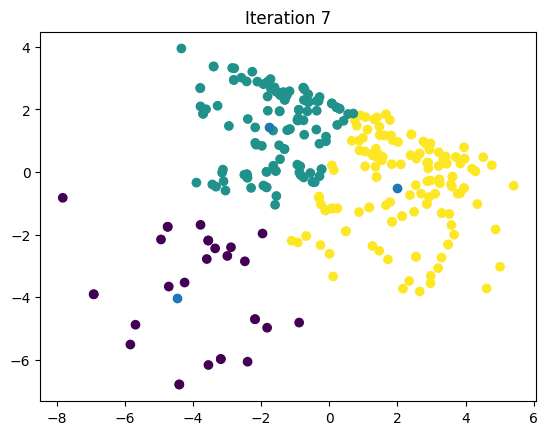

In [ ]:
max_iterations = 100
centroid_count = 3

centroids = random_centroids(data, centroid_count)
old_centroids = pd.DataFrame()
iteration = 1

while iteration < max_iterations and not centroids.equals(old_centroids):
    old_centroids = centroids

    labels = get_labels(data, centroids)
    centroids = new_centroids(data, labels, centroid_count)
    plot_clusters(data, labels, centroids, iteration)
    iteration += 1

In [ ]:
centroids

,0,1,2
danceability,5.797505,5.964946,7.403074
energy,3.442617,9.531953,9.028102
valence,3.654485,4.199894,8.160650


In [ ]:
labels.value_counts()

,count
2,138
1,120
0,29


In [ ]:
tracks[labels == 0][["track_name" ] + features]

,track_name,danceability,energy,valence
13,La La La La La La La La,0.426,0.217,0.1790
16,In the Snow,0.701,0.347,0.4430
20,Not the One,0.597,0.472,0.2330
30,Veronica,0.483,0.575,0.4100
33,Tangelo,0.507,0.177,0.4010
37,The Longest Wave,0.476,0.511,0.3390
45,The Hunter,0.256,0.523,0.3180
67,Slow Cheetah,0.390,0.344,0.2440
77,Hard to Concentrate,0.641,0.502,0.3260
81,If,0.340,0.150,0.2240


In [ ]:
from sklearn.cluster import KMeans

In [ ]:
kmeans = KMeans(3)
kmeans.fit(data)

KMeans(n_clusters=3)

In [ ]:
pd.DataFrame(kmeans.cluster_centers_, columns=features).T

,0,1,2
danceability,6.181366,6.420015,7.531800
energy,9.587681,4.181647,9.205038
valence,4.545926,4.225009,8.547106


In [ ]:
centroids

,0,1,2
danceability,5.797505,5.964946,7.403074
energy,3.442617,9.531953,9.028102
valence,3.654485,4.199894,8.160650
